In [13]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from build.autoneuronet import (
    operations,
    Var,
    Matrix,
    Linear,
    ReLU,
    Tanh,
    Sigmoid,
    NeuralNetwork,
    GradientDescentOptimizer,
    BCELoss,
)

# Moons Classification with Activation Functions


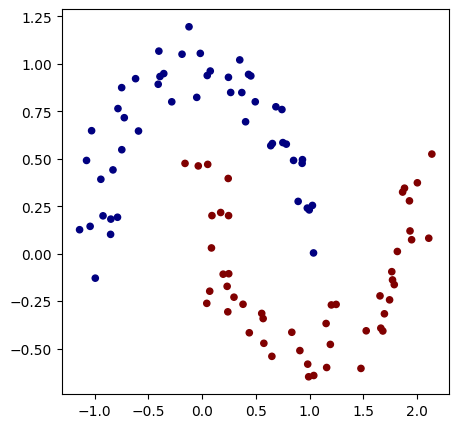

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
def numpy_to_matrix(numpy_array: np.ndarray) -> Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = float(numpy_array[i, j])

    return matrix

In [4]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [9]:
lr = 1e-2
epochs = 5000

model = NeuralNetwork(
    [
        Linear(2, 16, init="he"),
        ReLU(),
        Linear(16, 16, init="he"),
        ReLU(),
        Linear(16, 1, init="he"),
        Sigmoid(),
    ]
)
optimizer = GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [6]:
# Training Loop

for epoch in tqdm(
    range(epochs), desc="Training the moons classification Neural Network"
):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = BCELoss(y_matrix, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training the moons classification Neural Network:   1%|          | 27/5000 [00:00<00:36, 137.18it/s]

Epoch: 1 | Train Loss: 1.7594259343363914


Training the moons classification Neural Network:   2%|▏         | 117/5000 [00:00<00:38, 126.84it/s]

Epoch: 101 | Train Loss: 0.4760768737989177


Training the moons classification Neural Network:   4%|▍         | 218/5000 [00:01<00:33, 142.98it/s]

Epoch: 201 | Train Loss: 0.3536383201189944


Training the moons classification Neural Network:   6%|▋         | 324/5000 [00:02<00:31, 147.14it/s]

Epoch: 301 | Train Loss: 0.2955154231510953


Training the moons classification Neural Network:   9%|▊         | 429/5000 [00:03<00:31, 143.62it/s]

Epoch: 401 | Train Loss: 0.26561129517112425


Training the moons classification Neural Network:  11%|█         | 526/5000 [00:03<00:37, 119.54it/s]

Epoch: 501 | Train Loss: 0.24781059967932598


Training the moons classification Neural Network:  12%|█▏        | 624/5000 [00:04<00:33, 132.57it/s]

Epoch: 601 | Train Loss: 0.23576419207312632


Training the moons classification Neural Network:  14%|█▍        | 722/5000 [00:05<00:36, 117.24it/s]

Epoch: 701 | Train Loss: 0.22660438644974035


Training the moons classification Neural Network:  17%|█▋        | 828/5000 [00:06<00:32, 128.44it/s]

Epoch: 801 | Train Loss: 0.21958492031709265


Training the moons classification Neural Network:  19%|█▊        | 926/5000 [00:07<00:29, 136.44it/s]

Epoch: 901 | Train Loss: 0.21401063831211908


Training the moons classification Neural Network:  21%|██        | 1028/5000 [00:07<00:30, 128.22it/s]

Epoch: 1001 | Train Loss: 0.2095581725424348


Training the moons classification Neural Network:  22%|██▏       | 1124/5000 [00:08<00:29, 130.01it/s]

Epoch: 1101 | Train Loss: 0.20572476795012243


Training the moons classification Neural Network:  24%|██▍       | 1225/5000 [00:09<00:32, 117.67it/s]

Epoch: 1201 | Train Loss: 0.20177409907230281


Training the moons classification Neural Network:  26%|██▋       | 1319/5000 [00:10<00:31, 116.24it/s]

Epoch: 1301 | Train Loss: 0.19830915940455263


Training the moons classification Neural Network:  28%|██▊       | 1424/5000 [00:11<00:28, 125.19it/s]

Epoch: 1401 | Train Loss: 0.19525705200049295


Training the moons classification Neural Network:  31%|███       | 1526/5000 [00:11<00:25, 137.52it/s]

Epoch: 1501 | Train Loss: 0.19247295550185814


Training the moons classification Neural Network:  32%|███▎      | 1625/5000 [00:12<00:25, 131.65it/s]

Epoch: 1601 | Train Loss: 0.1898789933883732


Training the moons classification Neural Network:  34%|███▍      | 1724/5000 [00:13<00:25, 127.59it/s]

Epoch: 1701 | Train Loss: 0.1874073243189499


Training the moons classification Neural Network:  36%|███▋      | 1823/5000 [00:14<00:24, 131.12it/s]

Epoch: 1801 | Train Loss: 0.18503163613033713


Training the moons classification Neural Network:  38%|███▊      | 1919/5000 [00:14<00:24, 127.04it/s]

Epoch: 1901 | Train Loss: 0.18273790817601948


Training the moons classification Neural Network:  40%|████      | 2022/5000 [00:15<00:21, 140.66it/s]

Epoch: 2001 | Train Loss: 0.1804988751450912


Training the moons classification Neural Network:  43%|████▎     | 2127/5000 [00:16<00:20, 142.62it/s]

Epoch: 2101 | Train Loss: 0.17828025406441594


Training the moons classification Neural Network:  44%|████▍     | 2221/5000 [00:17<00:25, 107.56it/s]

Epoch: 2201 | Train Loss: 0.1760669758342897


Training the moons classification Neural Network:  46%|████▋     | 2317/5000 [00:18<00:34, 77.38it/s] 

Epoch: 2301 | Train Loss: 0.17384846609444196


Training the moons classification Neural Network:  49%|████▊     | 2427/5000 [00:19<00:19, 132.88it/s]

Epoch: 2401 | Train Loss: 0.17163753047873279


Training the moons classification Neural Network:  50%|█████     | 2516/5000 [00:19<00:17, 139.53it/s]

Epoch: 2501 | Train Loss: 0.16932554126986246


Training the moons classification Neural Network:  52%|█████▏    | 2618/5000 [00:20<00:17, 138.69it/s]

Epoch: 2601 | Train Loss: 0.16694887124086108


Training the moons classification Neural Network:  54%|█████▍    | 2720/5000 [00:21<00:16, 140.87it/s]

Epoch: 2701 | Train Loss: 0.1645306850650388


Training the moons classification Neural Network:  56%|█████▋    | 2825/5000 [00:22<00:15, 141.64it/s]

Epoch: 2801 | Train Loss: 0.1621724685265807


Training the moons classification Neural Network:  59%|█████▊    | 2930/5000 [00:22<00:14, 142.20it/s]

Epoch: 2901 | Train Loss: 0.15976526321901818


Training the moons classification Neural Network:  60%|██████    | 3020/5000 [00:23<00:13, 144.10it/s]

Epoch: 3001 | Train Loss: 0.15727935050392497


Training the moons classification Neural Network:  62%|██████▏   | 3124/5000 [00:24<00:13, 142.38it/s]

Epoch: 3101 | Train Loss: 0.15457916342706757


Training the moons classification Neural Network:  64%|██████▍   | 3214/5000 [00:24<00:14, 126.17it/s]

Epoch: 3201 | Train Loss: 0.15177694089616703


Training the moons classification Neural Network:  66%|██████▋   | 3317/5000 [00:25<00:11, 142.76it/s]

Epoch: 3301 | Train Loss: 0.14884532825649655


Training the moons classification Neural Network:  68%|██████▊   | 3422/5000 [00:26<00:11, 142.90it/s]

Epoch: 3401 | Train Loss: 0.14582058422121383


Training the moons classification Neural Network:  71%|███████   | 3526/5000 [00:27<00:10, 138.42it/s]

Epoch: 3501 | Train Loss: 0.14272768983474268


Training the moons classification Neural Network:  72%|███████▏  | 3616/5000 [00:27<00:09, 143.20it/s]

Epoch: 3601 | Train Loss: 0.13953612447780445


Training the moons classification Neural Network:  74%|███████▍  | 3721/5000 [00:28<00:09, 141.05it/s]

Epoch: 3701 | Train Loss: 0.13634939664298482


Training the moons classification Neural Network:  76%|███████▋  | 3821/5000 [00:29<00:09, 124.15it/s]

Epoch: 3801 | Train Loss: 0.13338976987582543


Training the moons classification Neural Network:  78%|███████▊  | 3919/5000 [00:30<00:10, 103.82it/s]

Epoch: 3901 | Train Loss: 0.13043304564450406


Training the moons classification Neural Network:  80%|████████  | 4024/5000 [00:31<00:07, 134.09it/s]

Epoch: 4001 | Train Loss: 0.12747285938341552


Training the moons classification Neural Network:  83%|████████▎ | 4126/5000 [00:31<00:06, 140.13it/s]

Epoch: 4101 | Train Loss: 0.12450433608617621


Training the moons classification Neural Network:  85%|████████▍ | 4229/5000 [00:32<00:05, 132.79it/s]

Epoch: 4201 | Train Loss: 0.12151051168744413


Training the moons classification Neural Network:  86%|████████▋ | 4318/5000 [00:33<00:04, 138.59it/s]

Epoch: 4301 | Train Loss: 0.11850801175510861


Training the moons classification Neural Network:  88%|████████▊ | 4420/5000 [00:34<00:04, 134.35it/s]

Epoch: 4401 | Train Loss: 0.11547136700939674


Training the moons classification Neural Network:  90%|█████████ | 4521/5000 [00:34<00:03, 138.69it/s]

Epoch: 4501 | Train Loss: 0.11243678730276123


Training the moons classification Neural Network:  92%|█████████▎| 4625/5000 [00:35<00:02, 140.13it/s]

Epoch: 4601 | Train Loss: 0.1094210024400097


Training the moons classification Neural Network:  95%|█████████▍| 4730/5000 [00:36<00:01, 141.43it/s]

Epoch: 4701 | Train Loss: 0.10644400227690888


Training the moons classification Neural Network:  96%|█████████▋| 4817/5000 [00:36<00:01, 134.42it/s]

Epoch: 4801 | Train Loss: 0.10350521299330827


Training the moons classification Neural Network:  98%|█████████▊| 4921/5000 [00:37<00:00, 140.34it/s]

Epoch: 4901 | Train Loss: 0.10057693549087585


Training the moons classification Neural Network: 100%|██████████| 5000/5000 [00:38<00:00, 130.55it/s]


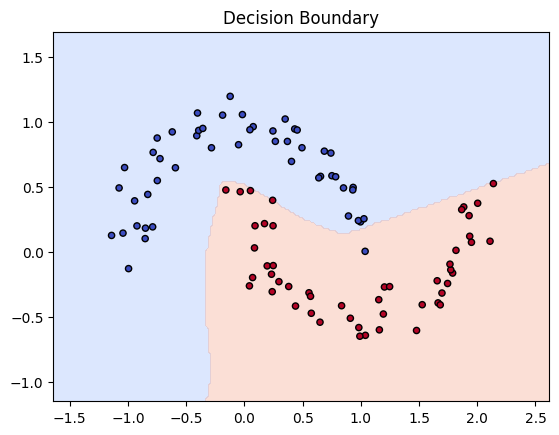

In [12]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()

In [ ]:
os.makedirs("models", exist_ok=True)
model.saveWeights("models/moons_model.bin")

In [ ]:
model.loadWeights("models/moons_model.bin")